OWID CO₂ Dataset – Exploratory Data Analysis
-1 What the data looks like  
-2 Missing values  
-3 Data types  
-4 Basic statistics  
-5 Outliers  
-6 Trends (climate change patterns)  

In [51]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use("seaborn-v0_8")

In [2]:
#Load the Data
df = pd.read_csv("../data/cleaned/owid_countries.csv")
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,country_iso
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG


Columns loaded correctly,Data looks reasonable,No strange symbols or corrupted rows

In [3]:
#Dataset Shape
df.shape

(42480, 80)

Historical data with 42480 rows and 80 columns.
Each row represents a country in a specific year.
Each column is a type of climate or emissions measurement (CO₂, methane, energy, GDP, etc.).

In [ ]:
#Dataset Information (Data Types + Missing)/ Data Quality
df.info()

Data quality- which columns are int, float, object;how many non-null values exist, whether any columns have incorrect data types.
1. 76 numeric columns (float64), 1 integer column (int64) → year, 3 text columns (object) → country, iso_code, country_iso
2.Non-Null Count (Missing Values) -
    country, year, iso_code have complete data,while otehr columns have moderate or very few values.

In [ ]:
#Basic Statistics Summary
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.describe().T.to_string(float_format="{:,.0f}".format))
#saving the statistics in csv for easy readability/understanding used --f"{int(x):,}" adds commas for readability.
# --.applymap() applies formatting to all values in the DataFrame.
stats = df.describe().T
stats_formatted = stats.applymap(lambda x: f"{int(x):,}")
stats_formatted.to_csv("../data/raw/owid_statistics.csv")

Stat summary
1.Years Covered: 1750–2024 (median ~1927)
2.Population & GDP: Highly skewed; few countries dominate totals
3.CO2 Emissions: Median per capita low (~1 ton), extreme outliers exist (>780 tons/person)
4.Other GHGs: Methane, N2O, total GHG show extreme right-skew; most countries emit little
5.Energy & Trade: Huge disparities in energy use per capita; CO2 trade shows large positive/negative flows
6.Temperature Impact: Median temperature change from GHG near zero; max highlights most affected regions
7.Distribution Pattern: Most variables are skewed; median often better represents a “typical” country

In [ ]:
#Missing Values — How Many Empty Cells Do We Have?
df.isna().sum()
missing_count = df.isna().sum()
missing_percent = (df.isna().mean() * 100).round(2)

# Combine Series into one DataFrame side by side
missing_info = pd.concat([missing_count, missing_percent], axis=1)
missing_info.columns = ['Missing_Count', 'Missing_Percent']
print(missing_info)

In [ ]:
#Missing Data Heatmap (Pattern of Missingness)
# plt.figure(figsize=(12,6))
# sns.heatmap(df.isna(), cbar=False)
# plt.title("Missing Values Heatmap")
# plt.show()

missing_percent = df.isna().mean() * 100

plt.figure(figsize=(12,6))
sns.heatmap(missing_percent.to_frame().T, annot=True, cmap='Reds', cbar=True)
plt.title("Percentage of Missing Values per Column")
plt.show()

In [28]:
#Check for Duplicate Rows
df.duplicated().sum()

np.int64(0)

Yay! The dataset doesnot have any duplicates.

In [ ]:
# Separate Numeric and Categorical Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print("Number of numeric columns:", len(numeric_cols))
print("Number of categorical columns:", len(categorical_cols))
#numeric_cols, categorical_cols

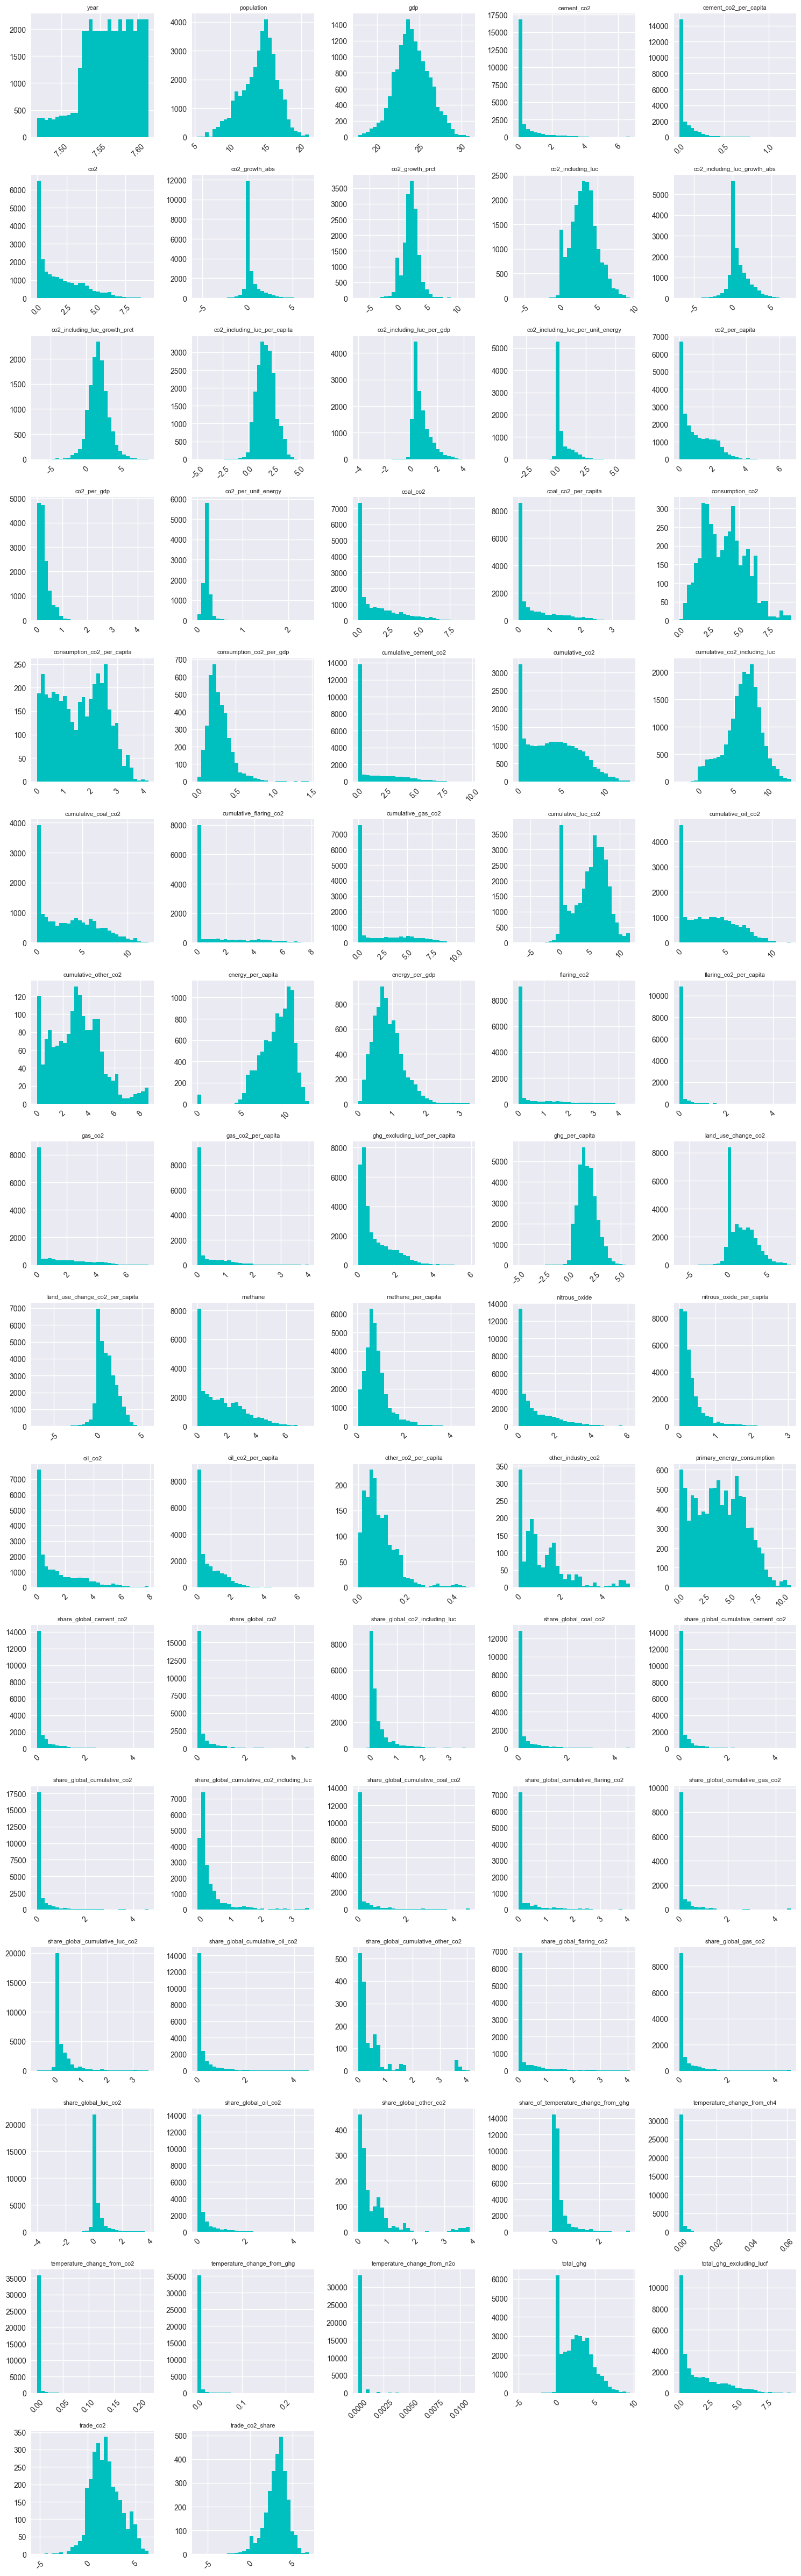

In [57]:
# Distributions of Numeric Columns (Histograms)- check for skewness, extreme values, odd distributions
n = len(numeric_cols)
cols = 5
rows = math.ceil(n / cols)  # automatically compute rows

plt.figure(figsize=(cols*3, rows*3))  # adjust figure size
for i, col in enumerate(numeric_cols, 1):
    # #check which columns have invalid values
    # if (df[col] <= -1).any():
    #      print(f"{col} has values <= -1")
    clean_data = df[col][df[col] > -1]
    plt.subplot(rows, cols, i)  # dynamically fit all columns
    plt.hist(np.log1p(clean_data), bins=30, color='c')
    plt.title(col, fontsize=8)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

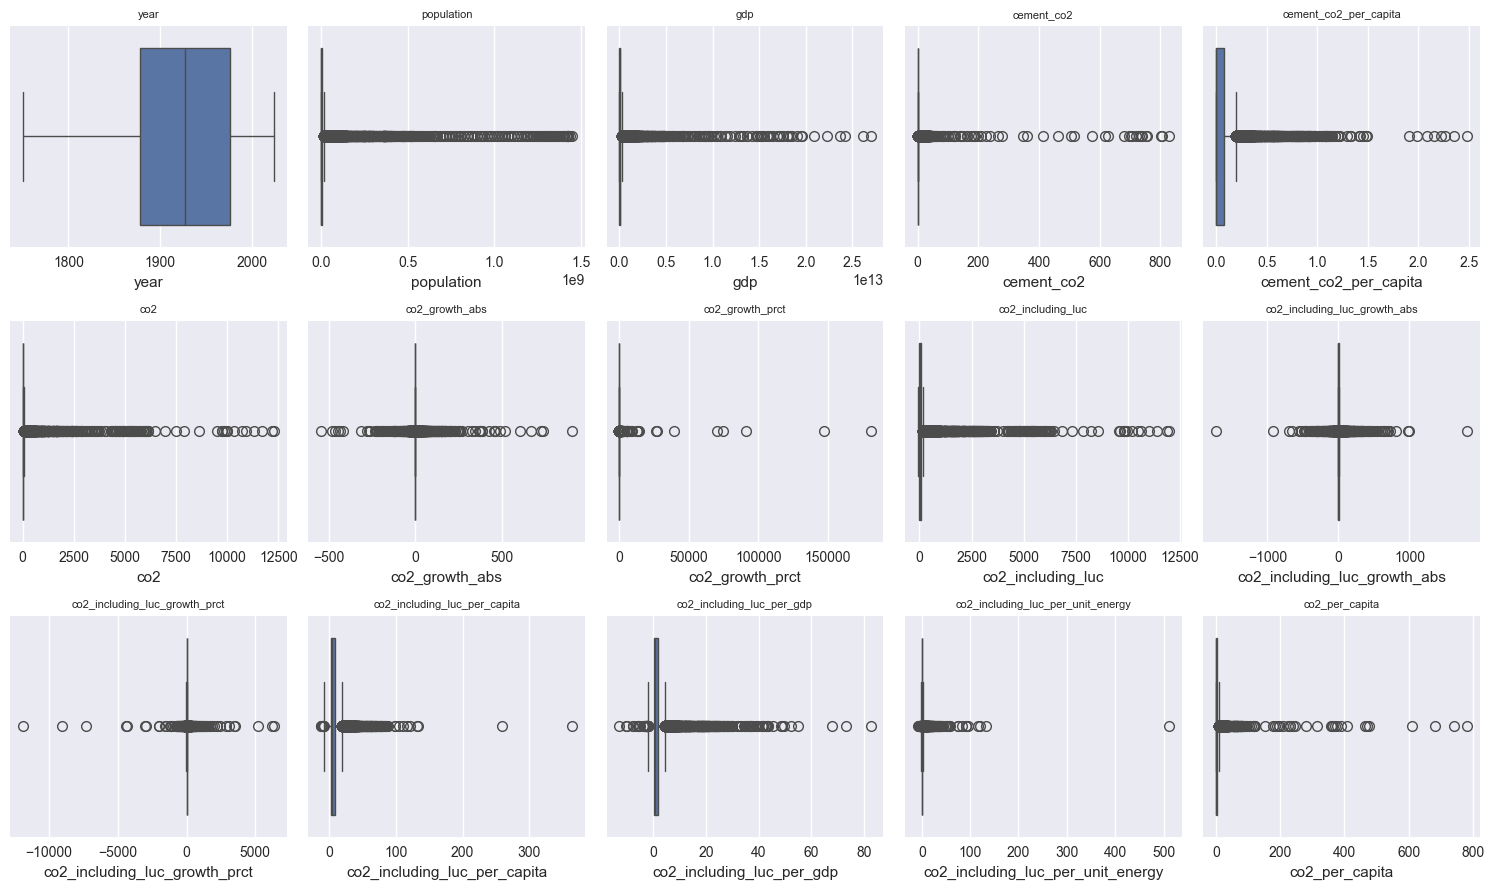

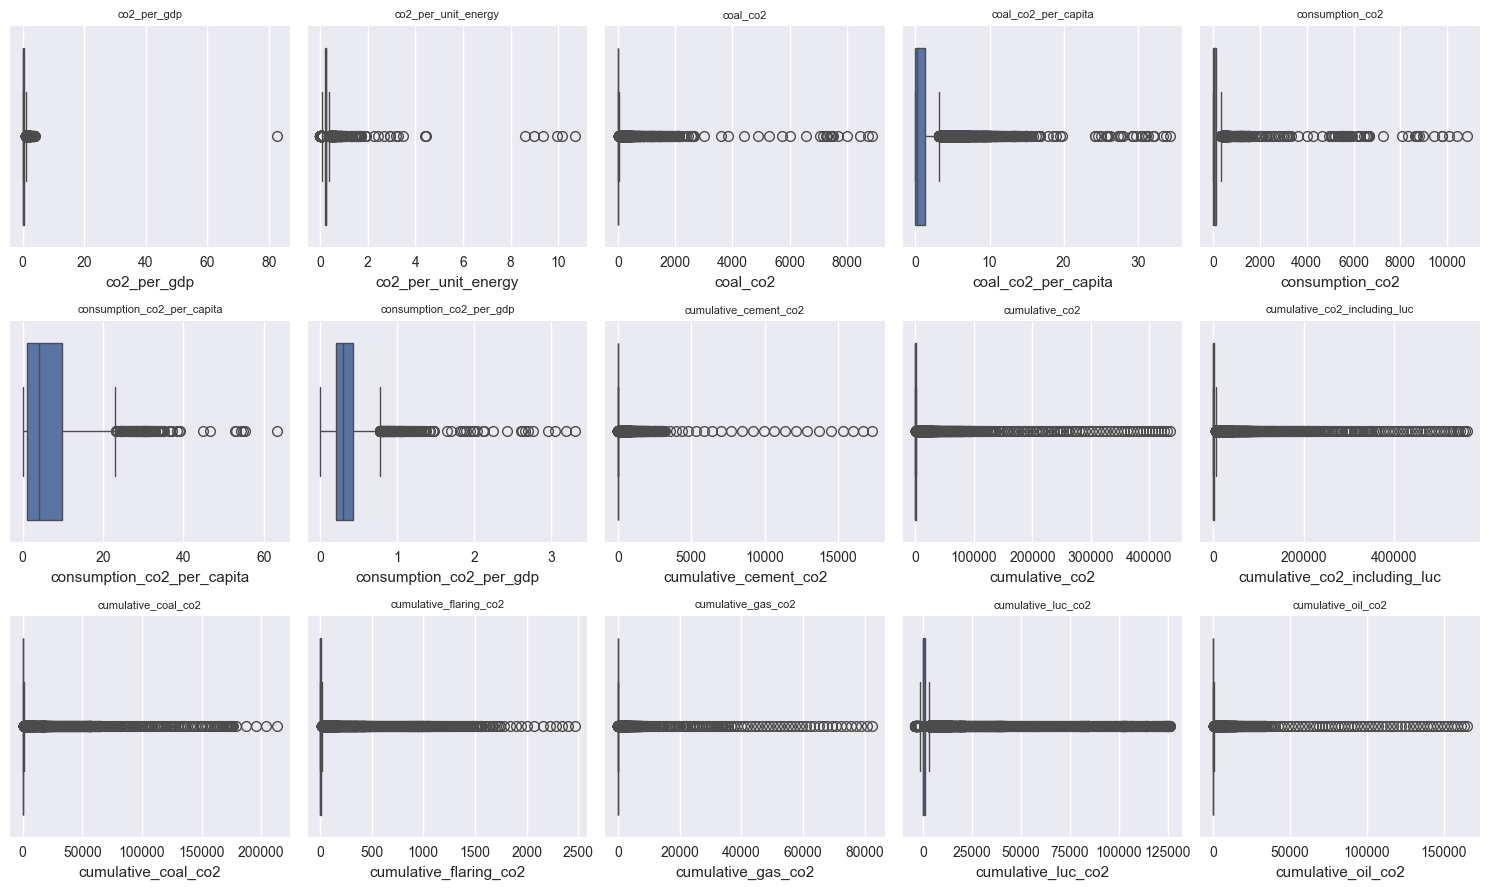

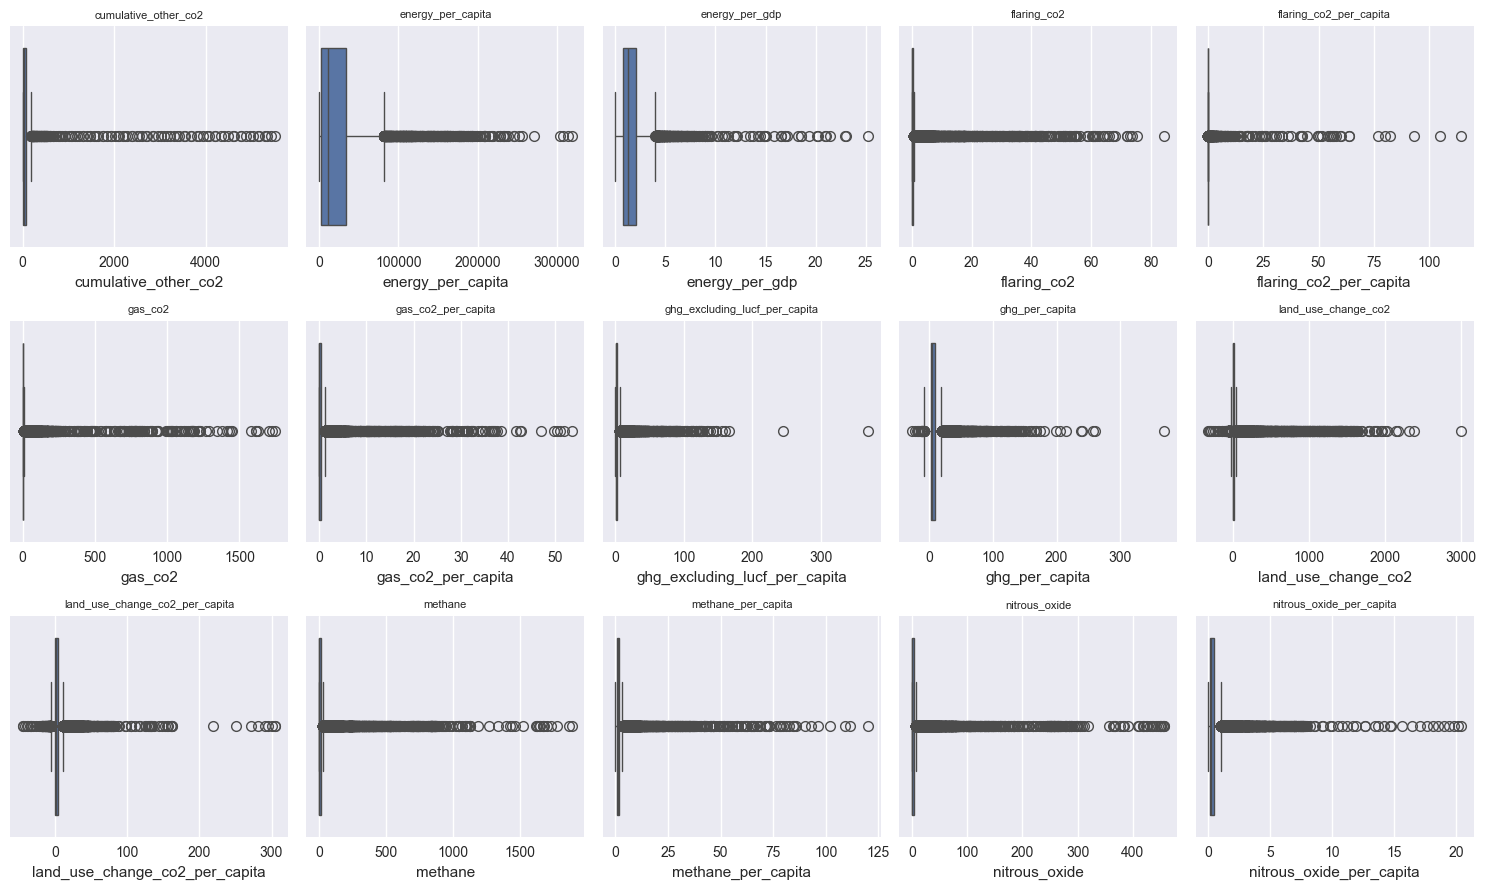

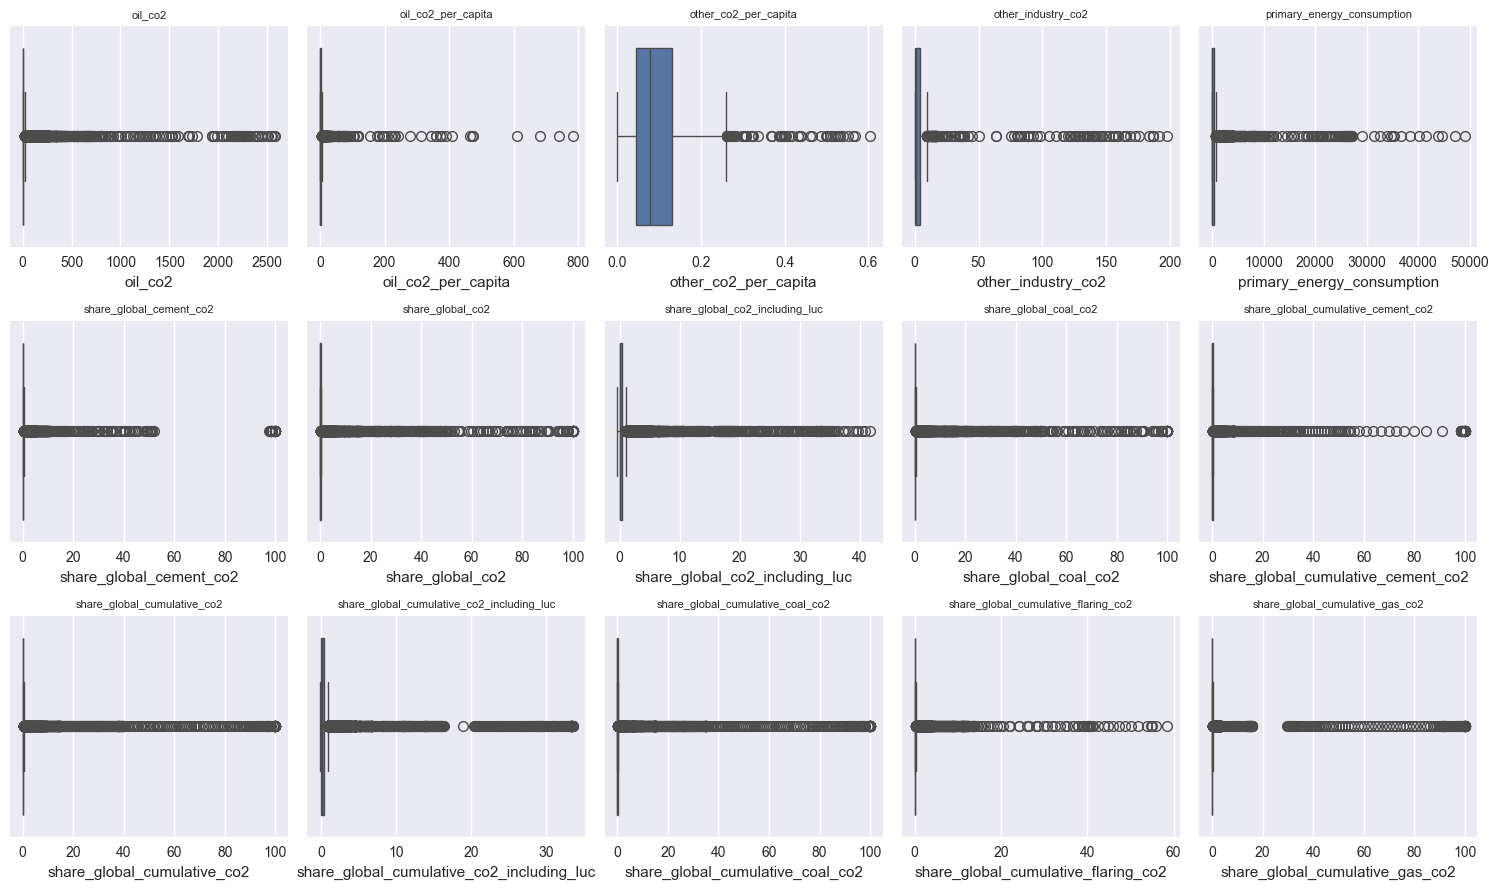

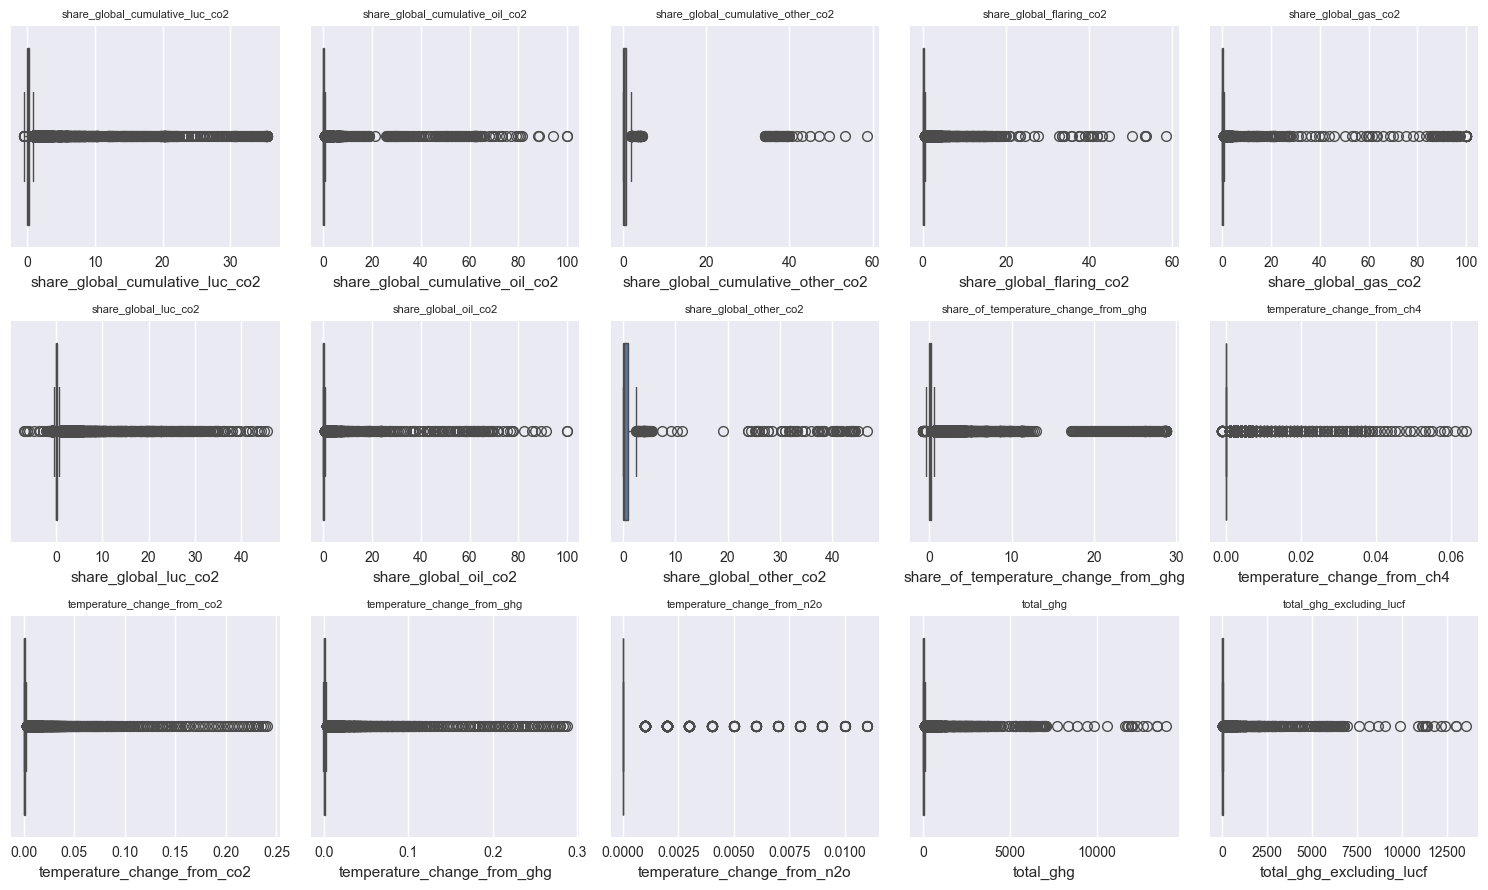

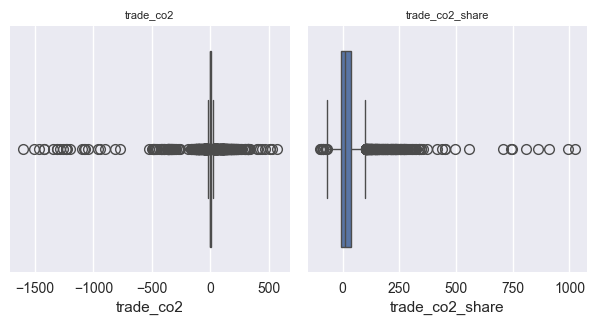

In [58]:
#Boxplots (Look for Outliers)
# plt.figure(figsize=(15,10))
# df[numeric_cols].plot(kind='box', subplots=True, layout=(2,2), figsize=(18,18))
# plt.suptitle("Boxplots for Outlier Detection")
# plt.show()
for j in range(0, len(numeric_cols), 15):
    plt.figure(figsize=(15,9))
    for i, col in enumerate(numeric_cols[j:j+15], 1):
        plt.subplot(3, 5, i)
        sns.boxplot(x=df[col])
        plt.title(col, fontsize=8)
    plt.tight_layout()
    plt.show()

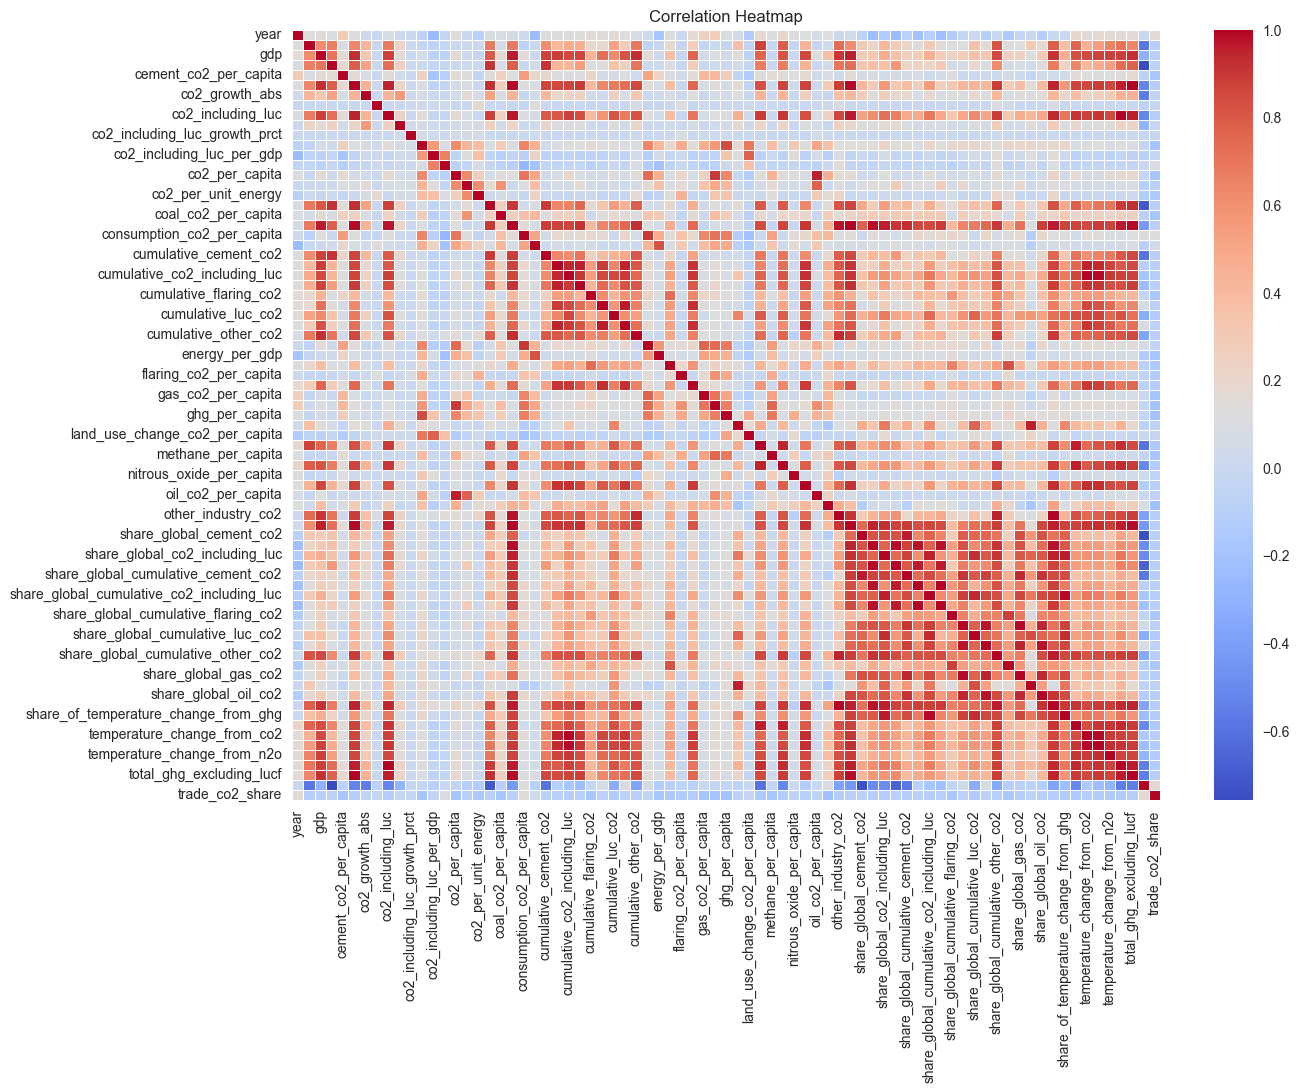

In [42]:
#Correlation Between Numeric Columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

c:\Users\Code Lou\Documents\projects\global_energy_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


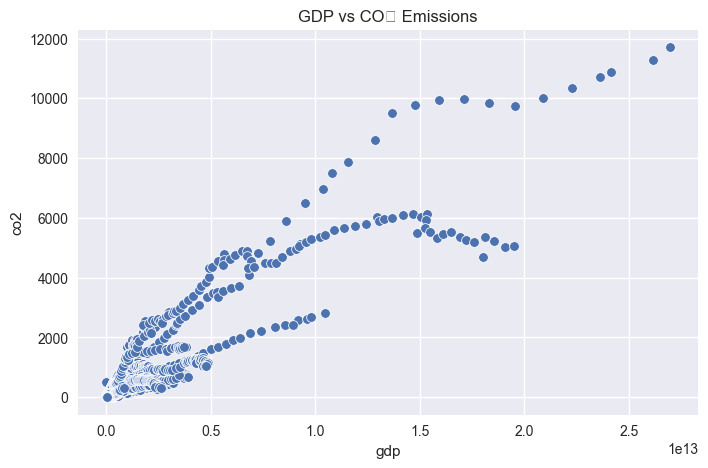

In [43]:
#Scatter Plot: GDP vs CO₂ Emissions
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['gdp'], y=df['co2'])
plt.title("GDP vs CO₂ Emissions")
plt.show()

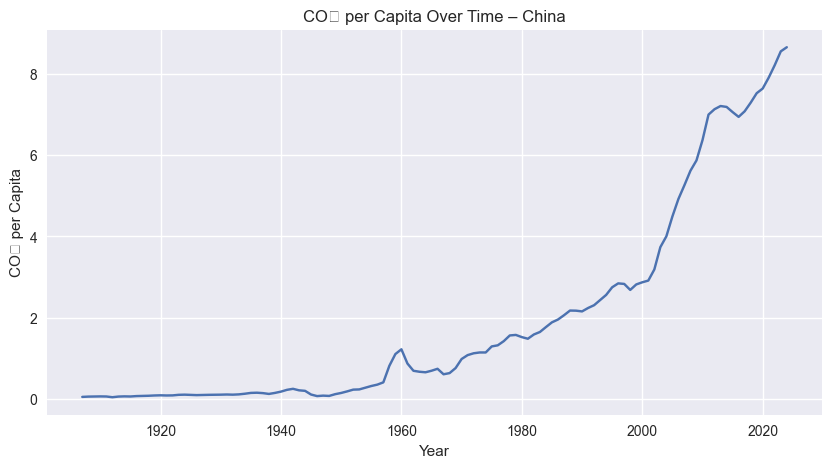

In [60]:
#CO₂ per Capita Trend Over Time 
df_afg = df[df['country'] == "China"]

plt.figure(figsize=(10,5))
plt.plot(df_afg['year'], df_afg['co2_per_capita'])
plt.title("CO₂ per Capita Over Time – China")
plt.xlabel("Year")
plt.ylabel("CO₂ per Capita")
plt.show()


In [ ]:
#Log Transform a Highly Skewed Column
df['co2_log'] = np.log1p(df['co2'])